1. Use the baseball salary dataset and the exploratory data analysis (EDA) to determine  visually which are the candidate features for the model (correlation and scatter plot) 
2. Assume the log of salary column as the transformed output (real output) and the rest of  the columns as predictors or inputs. 
3. Calculate the descriptive statistics for the dataset. What is this information good for? 
4. Plot the histogram of each column. How do you interpret the distribution plots? 
5. Use the same methods for feature selection/elimination given in the sample code (RFE  and stepwise forward/backward) to figure out the final model. 
6. For feature selection start with a larger number of features and monitor the performance measures. Pick the number of features based on the performance measure when there is a significant change and stop when you do not see a major improvement. 
7. Standardize the data by removing the mean and making the standard deviation equal to one (use from sklearn.preprocessing import StandardScaler, , and look at an example on how it is used) 
8. Normalize the features by scaling them to a range between 0 and 1. Use the normalize object in scikit learn library to perform normalization on the data. Read the documentation from the preprocessing library documentation and look at the sample code given in the documentation as a guide on how to perform normalization. 
9. Perform steps 1-6 for the standardized data and compare the results with the original analysis. What are the differences and how do you interpret the impact of standardization? 
10. Perform steps 1-6 for the normalized data and compare the results with the original analysis. What are the differences and how do you interpret the impact of normalization? 
11. Use a ridge regression approach to determine an optimum number of predictors for the baseball salary dataset. Find the value of alpha that corresponds to the number of predictors with manual tuning. (same technique you used to determine the number of predictors with the RFE model. Ignore the stepwise method). 
12.  Use a Lasso regression approach to determine an optimum number of predictors for the baseball salary dataset. Find the value of alpha that corresponds to the number of predictors with manual tuning. (same technique you used to determine the number of predictors with the RFE model. Ignore the stepwise method). Compare the results of the Lasso with the ridge regression. For steps 11 and 12, you need to adjust the alpha value 2 to get to desired results. Alpha is referred to as hyper parameter and needs tuning. 
Refer to the sample code that is provided for the lab. 
 
13. Include your code, the results and explanation of the results as a (.py) plus the output/results as comments in your code or as screenshots if it involves plots/graphics and upload to Canvas.  



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from pandas import set_option
from pandas import read_csv
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

import warnings

warnings.filterwarnings('ignore')

filename = 'Salaries.csv'
data = read_csv(filename)

In [3]:
data.head(10)

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800
5,Prof,A,20,20,Male,122400
6,AssocProf,A,20,17,Male,81285
7,Prof,A,18,18,Male,126300
8,Prof,A,29,19,Male,94350
9,Prof,A,51,51,Male,57800


In [4]:
data.groupby('discipline').salary.agg(['min','mean', 'max'])

,min,mean,max
discipline,,,
A,57800,98331.111111,155865
B,71065,116331.785714,186960


In [5]:
data.groupby('rank').salary.agg(['min', 'mean','max'])

,min,mean,max
rank,,,
AssocProf,62884,91786.230769,119800
AsstProf,63100,81362.789474,97032
Prof,57800,123624.804348,186960


In [6]:
data.groupby('sex').salary.agg(['min', 'mean','max'])

,min,mean,max
sex,,,
Female,62884,101002.410256,161101
Male,57800,115045.153846,186960


In [7]:
data.describe()

,phd,service,salary
count,78.000000,78.000000,78.000000
mean,19.705128,15.051282,108023.782051
std,12.498425,12.139768,28293.661022
min,1.000000,0.000000,57800.000000
25%,10.250000,5.250000,88612.500000
50%,18.500000,14.500000,104671.000000
75%,27.750000,20.750000,126774.750000
max,56.000000,51.000000,186960.000000


<AxesSubplot:title={'center':'salary'}, xlabel='[sex]'>

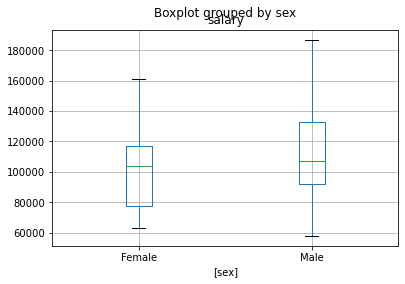

In [8]:
data.boxplot(column=['salary'], by=['sex'])

<AxesSubplot:title={'center':'salary'}, xlabel='[rank]'>

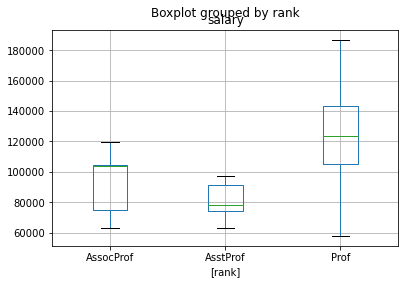

In [9]:
data.boxplot(column=['salary'], by=['rank'])

<AxesSubplot:xlabel='salary', ylabel='discipline'>

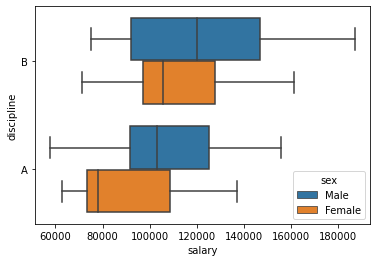

In [9]:
sns.boxplot(x = data['salary'],
            y = data['discipline'],
            hue = data['sex'])

<AxesSubplot:xlabel='salary', ylabel='rank'>

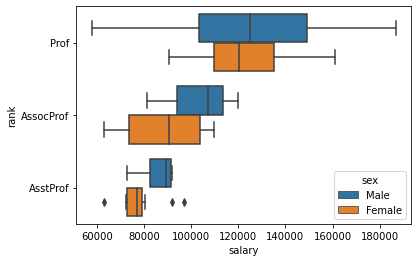

In [10]:
sns.boxplot(x = data['salary'],
            y = data['rank'],
            hue = data['sex'])

array([[<AxesSubplot:title={'center':'phd'}>,
        <AxesSubplot:title={'center':'service'}>],
       [<AxesSubplot:title={'center':'salary'}>, <AxesSubplot:>]],
      dtype=object)

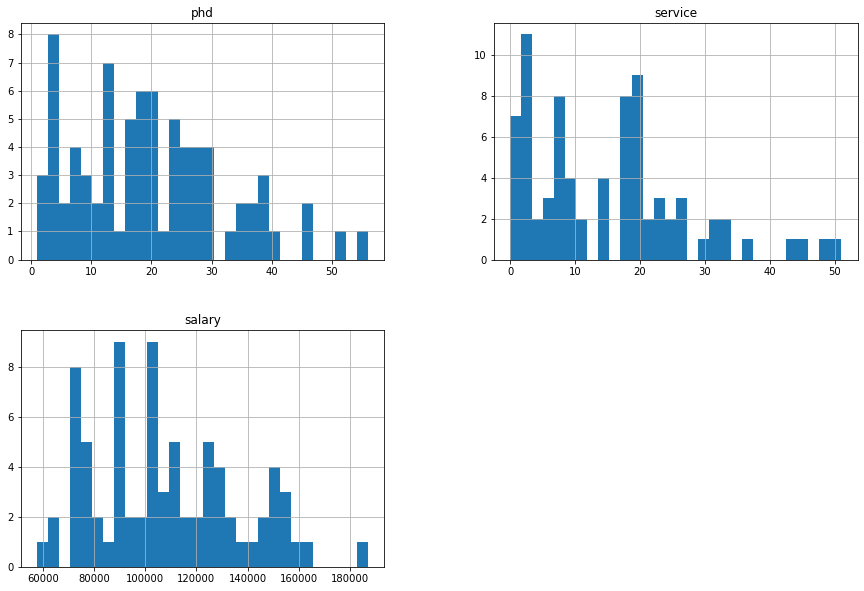

In [11]:
data.hist(bins=30, figsize=(15, 10))

<AxesSubplot:>

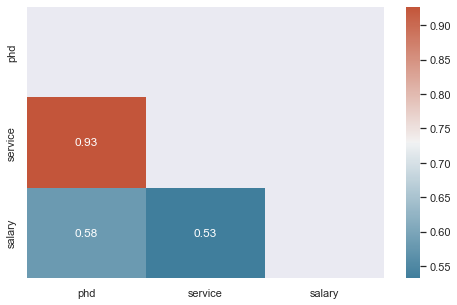

In [12]:
corr = data[['phd','service','salary']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.set(rc={'figure.figsize':(8,5)})
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

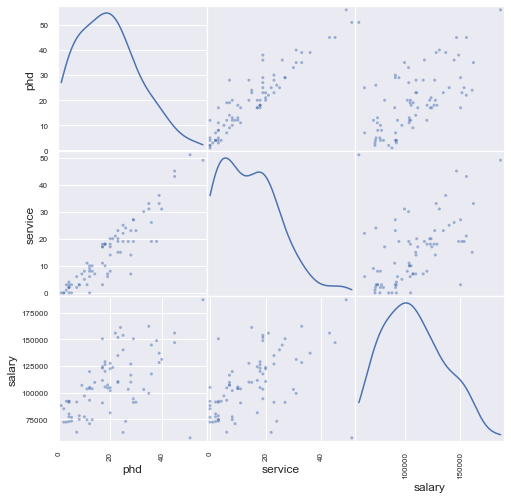

In [13]:
scatter_matrix(data, figsize=(8,8), diagonal='kde')
plt.show()

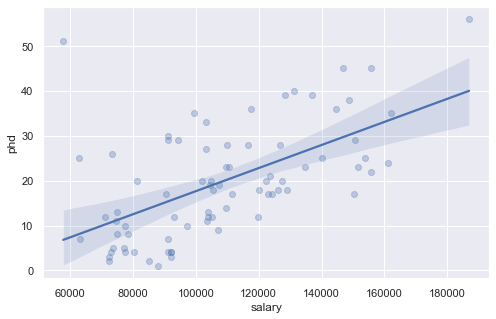

In [14]:
x = sns.regplot(x="salary", 
                y="phd", 
                data=data, 
                scatter_kws={'alpha':0.3})

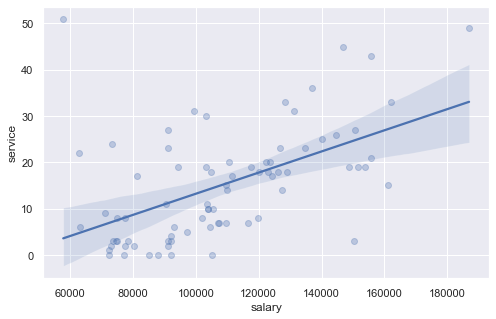

In [15]:
x = sns.regplot(x="salary", 
                y="service", 
                data=data, 
                scatter_kws={'alpha':0.3})

## One-Hot Encoding

In [10]:
# Take all the categorical features and convert them  into on-hot features
# name the new categorical feature same as "oldColumn_categoricalValue"
# Remove the original categorical features 
#

categorical_cols = data.columns[data.dtypes==object].tolist()
data_cat = data[categorical_cols]
enc = OneHotEncoder()
enc.fit(data_cat)

onehotlabels = enc.transform(data_cat).toarray()

new_columns=list()
for col, values in zip(data_cat.columns, enc.categories_):
    new_columns.extend([col + '_' + str(value) for value in values])

new_df= pd.concat([data_cat, pd.DataFrame(onehotlabels, columns=new_columns)], axis='columns')

data_onehot = new_df.drop(categorical_cols, axis=1)

data_minus_cat = data.drop(categorical_cols, axis=1)

data_new = pd.concat([data_onehot, data_minus_cat], axis=1)



In [11]:
data_new.head()

,rank_AssocProf,rank_AsstProf,rank_Prof,discipline_A,discipline_B,sex_Female,sex_Male,phd,service,salary
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,56,49,186960
1,0.0,0.0,1.0,1.0,0.0,0.0,1.0,12,6,93000
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,23,20,110515
3,0.0,0.0,1.0,1.0,0.0,0.0,1.0,40,31,131205
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,20,18,104800


## Feature Selection

In [12]:
X = data_new.drop('salary',axis=1)
Y = data_new['salary']
X.shape

(78, 9)

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

In [22]:
import re

def run_rfe(X,Y,model = LinearRegression()):
    previous_score = 0.00

    for i in range(X.shape[1]):
        NUM_FEATURES = i+1
        #model = LinearRegression()
        rfe = RFE(model,  n_features_to_select=NUM_FEATURES, step=1)
        fit = rfe.fit(X, Y)
        #print("Num Features:", fit.n_features_)
        #print("Selected Features:", fit.support_)
        #print("Feature Ranking:", fit.ranking_)
        # calculate the score for the selected features
        score = rfe.score(X,Y)
        delta = score - previous_score
        print("Model Score with "+ str(fit.n_features_) +" selected features is: ", "{:0.3f}".format(score), '(',"{:0.3f}".format(delta),')')
        previous_score = score
        
run_rfe(X,Y,LinearRegression())


Model Score with 1 selected features is:  0.443 ( 0.443 )
Model Score with 2 selected features is:  0.589 ( 0.146 )
Model Score with 3 selected features is:  0.589 ( 0.000 )
Model Score with 4 selected features is:  0.601 ( 0.012 )
Model Score with 5 selected features is:  0.601 ( 0.000 )
Model Score with 6 selected features is:  0.608 ( 0.007 )
Model Score with 7 selected features is:  0.608 ( 0.000 )
Model Score with 8 selected features is:  0.631 ( 0.024 )
Model Score with 9 selected features is:  0.636 ( 0.005 )


## Looks like RFE should pick 4  features.

In [23]:
def pick_rfe_n_features(X, Y, NUM_FEATURES,model = LinearRegression()):
    #NUM_FEATURES = 4 
    #model = LinearRegression()
    rfe = RFE(model,  n_features_to_select=NUM_FEATURES, step=1)
    fit = rfe.fit(X, Y)
    print("Num Features:", fit.n_features_)
    print("Selected Features:", fit.support_)
    print("Feature Ranking:", fit.ranking_)
    # calculate the score for the selected features
    score = rfe.score(X,Y)
    print("Model Score with selected features is: ", score)

    print(X.columns[rfe.support_])

pick_rfe_n_features(X, Y, 4)

Num Features: 4
Selected Features: [False  True  True  True  True False False False False]
Feature Ranking: [2 1 1 1 1 4 3 5 6]
Model Score with selected features is:  0.6005919052734032
Index(['rank_AsstProf', 'rank_Prof', 'discipline_A', 'discipline_B'], dtype='object')


# 4 features selected by RFE :
## 'rank_AsstProf', 'rank_Prof', 'discipline_A', 'discipline_B'

In [16]:
# stepwise forward-backward selection
# need to change the input types as X in this function needs to be a pandas
# dataframe
 
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    #col_names = X.columns
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
            
        pval_tags = new_pval.index    
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(pval_tags[best_feature])
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        pvalues_tags = pvalues.index
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(pvalues_tags[worst_feature])
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


In [17]:
result = stepwise_selection(X, Y,threshold_in=0.01, threshold_out = 0.05, verbose=True)

print('resulting features:')
print(result)

Add                               1 with p-value 3.02524e-11
Add                               5 with p-value 1.91396e-06
Add                               4 with p-value 1.5906e-09
Add                               0 with p-value 0.00805219
resulting features:
['rank_Prof', 'discipline_B', 'discipline_A', 'phd']


In [19]:
Y

0     186960
1      93000
2     110515
3     131205
4     104800
       ...  
73    105450
74    104542
75    124312
76    109954
77    109646
Name: salary, Length: 78, dtype: int64

# 4 features selected by Stepwise Selection :
## 'rank_Prof', 'discipline_B', 'discipline_A', 'phd'

# Data Standardization
#### Normalize the features by scaling them to a range between 0 and 1. Use the normalize object in scikit learn library to perform normalization on the data. Read the documentation from the preprocessing library documentation and look at the sample code given in the documentation as a guide on how to perform normalization. 

In [23]:
# Standardize ( mean = 0 m SD = 1 ) the numerical features.
# One-hot encoding columns are excluded from Standardization
#

num_cols = ['phd','service']
scaler = StandardScaler()
scaler.fit(data[num_cols])
#print(scaler.mean_)
data_standard = pd.DataFrame(scaler.transform(data[num_cols]), columns=num_cols)


In [24]:
data_new_standard = pd.concat([data_new.drop(num_cols,axis=1), data_standard], axis=1)

In [25]:
X = data_new_standard.drop('salary',axis=1)
Y = data_new_standard['salary']
X.shape

(78, 9)

## Stepwise Selection

In [26]:
result = stepwise_selection(X, Y,threshold_in=0.01, threshold_out = 0.05, verbose=True)

print('resulting features:')
print(result)

Add                               0 with p-value 3.02524e-11
Add                               0 with p-value 1.91396e-06
Add                               4 with p-value 1.5906e-09
Add                               0 with p-value 0.00805219
resulting features:
['rank_Prof', 'discipline_B', 'discipline_A', 'phd']


## RFE

In [27]:
run_rfe(X,Y)

Model Score with 1 selected features is:  0.4427306141262478
Model Score with 2 selected features is:  0.588962632545631
Model Score with 3 selected features is:  0.588962632545631
Model Score with 4 selected features is:  0.6005919052734032
Model Score with 5 selected features is:  0.6005919052734032
Model Score with 6 selected features is:  0.6280054618250388
Model Score with 7 selected features is:  0.6319634757345207
Model Score with 8 selected features is:  0.6363956624427634
Model Score with 9 selected features is:  0.6363956624427634


# Observation :
### RFE could pick 4 or 6 features

In [28]:
pick_rfe_n_features(X, Y, 4)


Num Features: 4
Selected Features: [False  True  True  True  True False False False False]
Feature Ranking: [2 1 1 1 1 5 6 3 4]
Model Score with selected features is:  0.6005919052734032
Index(['rank_AsstProf', 'rank_Prof', 'discipline_A', 'discipline_B'], dtype='object')


In [29]:
pick_rfe_n_features(X, Y, 6)


Num Features: 6
Selected Features: [ True  True  True  True  True False False  True False]
Feature Ranking: [1 1 1 1 1 3 4 1 2]
Model Score with selected features is:  0.6280054618250388
Index(['rank_AssocProf', 'rank_AsstProf', 'rank_Prof', 'discipline_A',
       'discipline_B', 'phd'],
      dtype='object')


# Ridge Regression
#### 11. Use a ridge regression approach to determine an optimum number of predictors for the baseball salary dataset. Find the value of alpha that corresponds to the number of predictors with manual tuning. (same technique you used to determine the number of predictors with the RFE model. Ignore the stepwise method). 

In [30]:
for al in [0.001,0.01,10,100,1000]:
    print('Alpha : '+ str(al))
    run_rfe(X,Y,Ridge(alpha=al))


Alpha : 0.001
Model Score with 1 selected features is:  0.44273061288325943
Model Score with 2 selected features is:  0.5889626306213288
Model Score with 3 selected features is:  0.5889626309868562
Model Score with 4 selected features is:  0.6005919038444131
Model Score with 5 selected features is:  0.6005919045309633
Model Score with 6 selected features is:  0.6280054611653125
Model Score with 7 selected features is:  0.6319634747657095
Model Score with 8 selected features is:  0.6363956614267348
Model Score with 9 selected features is:  0.6363956614367527
Alpha : 0.01
Model Score with 1 selected features is:  0.4427304899458625
Model Score with 2 selected features is:  0.5889624403136664
Model Score with 3 selected features is:  0.5889624768169537
Model Score with 4 selected features is:  0.6005917626583337
Model Score with 5 selected features is:  0.6005918310766356
Model Score with 6 selected features is:  0.6280053959402847
Model Score with 7 selected features is:  0.6319633790126

# Observations :

#### As we are incleasing alpha value, 
####


# Lasso Regresison
#### 12.  Use a Lasso regression approach to determine an optimum number of predictors for the baseball salary dataset. Find the value of alpha that corresponds to the number of predictors with manual tuning. (same technique you used to determine the number of predictors with the RFE model. Ignore the stepwise method). Compare the results of the Lasso with the ridge regression. For steps 11 and 12, you need to adjust the alpha value 2 to get to desired results. Alpha is referred to as hyper parameter and needs tuning. 

In [31]:
for al in [.001,0.01,10,100,1000]:
    print('Alpha : '+ str(al))
    run_rfe(X,Y,Lasso(alpha=al, max_iter=10e5))


Alpha : 0.001
Model Score with 1 selected features is:  0.28965418163781187
Model Score with 2 selected features is:  0.4563356661637965
Model Score with 3 selected features is:  0.6005919052733744
Model Score with 4 selected features is:  0.6280054618250066
Model Score with 5 selected features is:  0.6319634757344499
Model Score with 6 selected features is:  0.6319634757344694
Model Score with 7 selected features is:  0.6363956624427052
Model Score with 8 selected features is:  0.6363956624427052
Model Score with 9 selected features is:  0.6363956624427052
Alpha : 0.01
Model Score with 1 selected features is:  0.2896541816371321
Model Score with 2 selected features is:  0.4563356661616538
Model Score with 3 selected features is:  0.6005919052705194
Model Score with 4 selected features is:  0.628005461821858
Model Score with 5 selected features is:  0.6319634757274313
Model Score with 6 selected features is:  0.6319634757293845
Model Score with 7 selected features is:  0.63639566243693

# Observations :

#### 
####


# Extra : from the sample code that is provided for the lab. 
## Running Linear, Ridge and Lasso

In [32]:
#newX = data[['phd','service']]
#newY = data['salary']

newX = data_new_standard.drop('salary',axis=1)
newY = data_new_standard['salary']

24 24
linear regression train score: 0.7190376037138377
linear regression test score: 0.3920338587264103
ridge regression train score low alpha: 0.7190373824815355
ridge regression test score low alpha: 0.3918595302794635
ridge regression train score high alpha: 0.4784532863047031
ridge regression test score high alpha: 0.13732269260224594


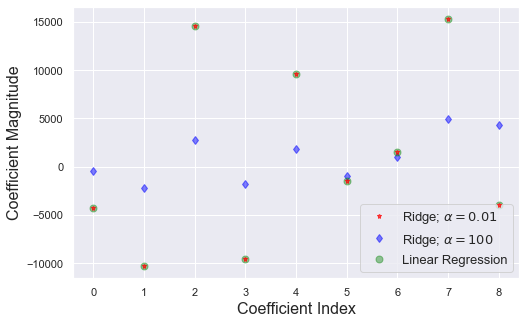

In [33]:


X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)
print(len(X_test), len(y_test))
lr = LinearRegression()
lr.fit(X_train, y_train)

rr = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(X_train, y_train)
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train, y_train)
train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)
Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)
Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)


print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print( "ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)



plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.show()



In [34]:
'''
multiple linear regression with Lasso
'''
#import math 


#import numpy as np
# difference of lasso and ridge regression is that some of the coefficients can be zero i.e. some of the features are 
# completely neglected


X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.3,random_state=3)

lasso = Lasso()
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print('Alpha(default) : ', 1.0)
print("Lasso training score:", train_score) 
print("test score: ", test_score)
print("Lasso number of features used: ", coeff_used)
print("*"*20)

lasso05 = Lasso(alpha=10, max_iter=10e5)
lasso05.fit(X_train,y_train)
train_score05=lasso05.score(X_train,y_train)
test_score05=lasso05.score(X_test,y_test)
coeff_used05 = np.sum(lasso05.coef_!=0)
print( "Lasso training score for alpha=0.5:", train_score05 )
print( "Lasso test score for alpha =0.5: ", test_score05)
print( "Lasso number of features used: for alpha =0.5:", coeff_used05)
print("*"*20)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print( "Lasso training score for alpha=0.01:", train_score001 )
print( "Lasso test score for alpha =0.01: ", test_score001)
print( "Lasso number of features used: for alpha =0.01:", coeff_used001)
print("*"*20)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)
print( "Lasso training score for alpha=0.0001:", train_score00001 )
print( "Lasso test score for alpha =0.0001: ", test_score00001)
print( "Lasso number of features used: for alpha =0.0001:", coeff_used00001)
print("*"*20)


Alpha(default) :  1.0
Lasso training score: 0.7190375359277686
test score:  0.39192145568930437
Lasso number of features used:  9
********************
Lasso training score for alpha=0.5: 0.7190308703271246
Lasso test score for alpha =0.5:  0.39109314185779265
Lasso number of features used: for alpha =0.5: 8
********************
Lasso training score for alpha=0.01: 0.7190376037069535
Lasso test score for alpha =0.01:  0.3920327459295615
Lasso number of features used: for alpha =0.01: 9
********************
Lasso training score for alpha=0.0001: 0.7190376037138371
Lasso test score for alpha =0.0001:  0.39203384760402193
Lasso number of features used: for alpha =0.0001: 8
********************


LR training score: 0.7190376037138377
LR test score:  0.3920338587264103


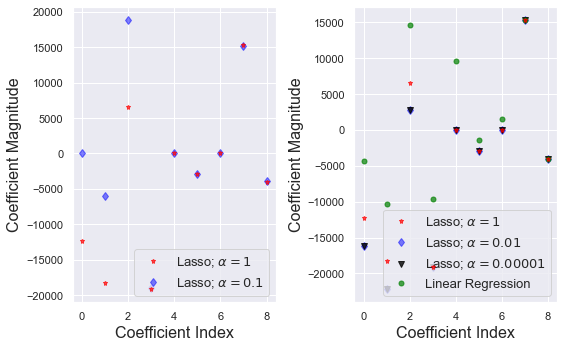

In [35]:

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print( "LR training score:", lr_train_score )
print( "LR test score: ", lr_test_score)
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso05.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.1$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()